<h1><center>High Level Analysis</center></h1>

In [1]:
#load libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as md

In [3]:
# load data
calls = pd.read_csv('../Data/911_calls_for_service_clean_final.csv',index_col='callDateTime',parse_dates=True)
calls.head()

,priority,district,description,callNumber,incidentLocation,location,lat,lon
callDateTime,,,,,,,,
2015-07-13 10:41:00,Medium,CD,SEE TEXT,P151941002,0 N CALVERT ST,"(39.2899299,-76.6123462)",39.289930,-76.612346
2015-07-13 10:47:00,Medium,CD,911 NO VOICE,P151941003,600 E FAYETTE ST,"(39.2906737,-76.6071600)",39.290674,-76.607160
2015-07-13 10:42:00,Medium,CD,911 NO VOICE,P151941004,200 E BALTIMORE ST,"(39.2898910,-76.6120720)",39.289891,-76.612072
2015-07-13 10:45:00,Low,CD,PRKG COMPLAINT,P151941005,800 PARK AV,"(39.2985163,-76.6184754)",39.298516,-76.618475
2015-07-13 10:46:00,Medium,SW,AUTO THEFT,P151941006,3500 CLIFTON AV,"(39.3112130,-76.6763150)",39.311213,-76.676315


In [9]:
#total records
len(calls)

2799860

In [13]:
# function to set the label of subplots
def label(ax, string):
    ax.annotate(string, (1, 1), xytext=(-8, -4), ha='right', va='top', size=14, 
                xycoords='axes fraction', textcoords='offset points') 
    
# Function to set explode value for pie slice
def isExplode(x):
    if x == True:
        return 0.1
    else:
        return 0
    
# Function to draw pie chart and explode the slice with max size
def DrawPieChart(data, title, savefile = np.nan):
    #convert to dataframe
    data = pd.Series.to_frame(data);
    
    data['Size'] = data / data.sum() * 100
    
    # Create new attribute to set the explode slice
    data['Explode'] = data['Size'].max() == data['Size']    
    data['Explode'] = data['Explode'].apply(isExplode)
    
    fig1, ax1 = plt.subplots(figsize=(15,8))
    ax1.pie(data['Size'], explode = data['Explode'], autopct='%1.1f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.legend(data.index, loc="upper right")
    plt.title(title, fontsize=20)
    plt.tight_layout()
    if (savefile != np.nan):
        plt.savefig(savefile, bbox_inches='tight')
    plt.show()
    
    print(data)
    
def SetChartProperties(ax, xlabel, ylabel, labeltext):
    ax.grid('on', which='minor', axis='x' )
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    label(ax, labeltext)

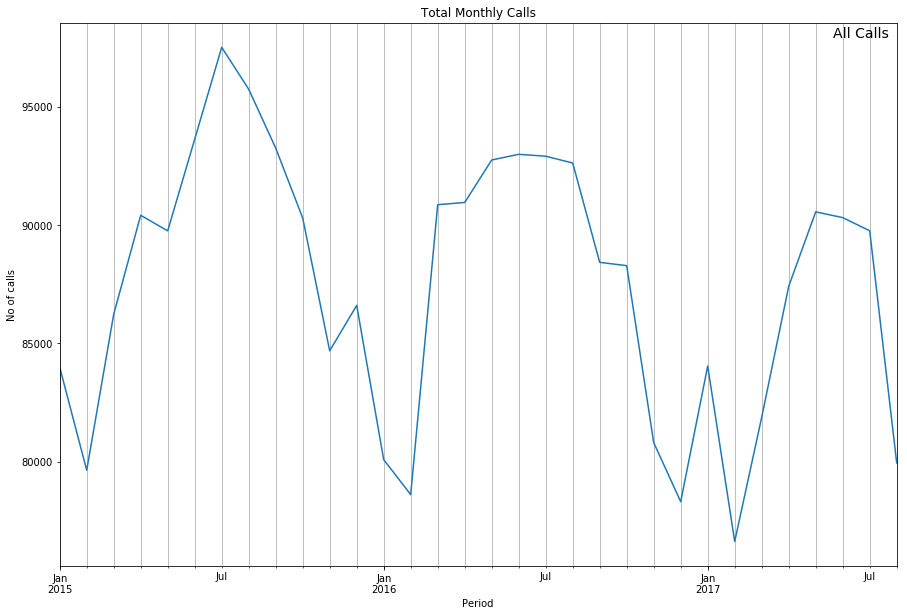

In [8]:
# get all calls by month and create line chart
ax = calls.resample('M').callNumber.count().plot(figsize=(15,10), title="Total Monthly Calls")
SetChartProperties(ax, 'Period', 'No of calls', 'All Calls')
plt.savefig('totalcalls.png', bbox_inches='tight')

In [51]:
# average call per month
calls.resample('M').priority.count().mean()

87495.625

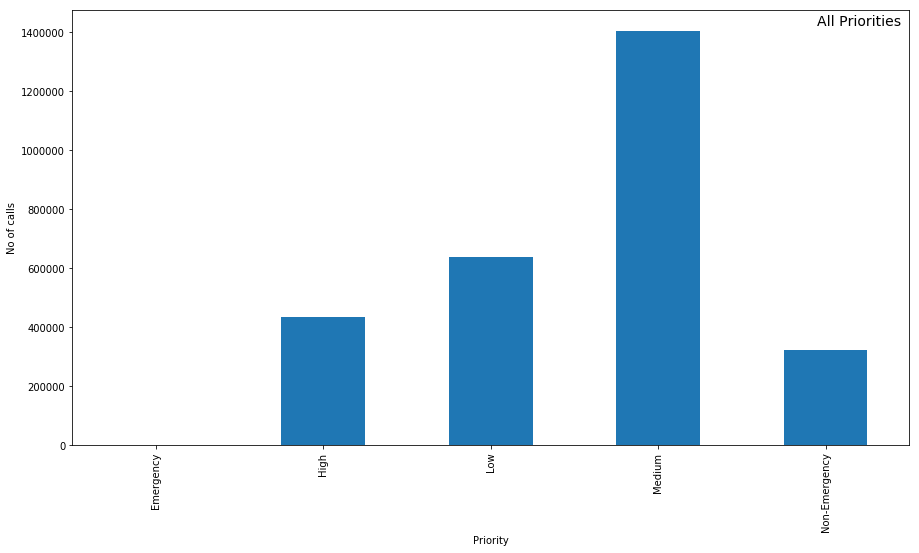

In [10]:
# get bar chart for all priorities
ax = calls.groupby('priority').callNumber.count()[:-1].plot(kind='bar', figsize=(15,8))
SetChartProperties(ax, 'Priority', 'No of calls', 'All Priorities')
plt.savefig('totalpriority.png', bbox_inches='tight')

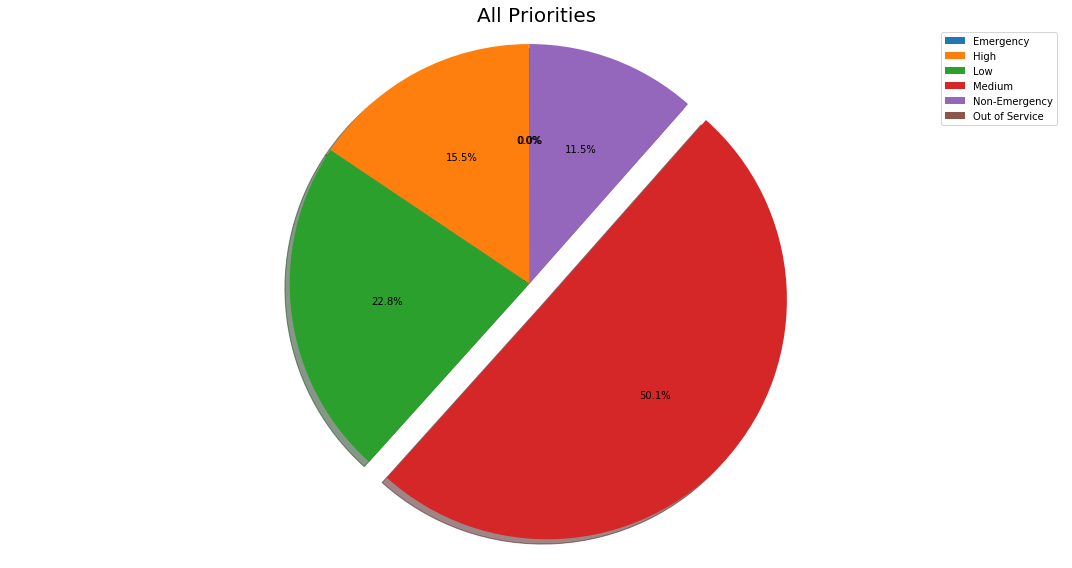

                callNumber       Size  Explode
priority                                      
Emergency             1004   0.035859      0.0
High                435238  15.544992      0.0
Low                 637225  22.759174      0.0
Medium             1403897  50.141686      0.1
Non-Emergency       321693  11.489610      0.0
Out of Service         803   0.028680      0.0


In [14]:
# get pie chart for all priorities
DrawPieChart(calls.groupby('priority').callNumber.count(), 'All Priorities', 'totalprioritypie.png')

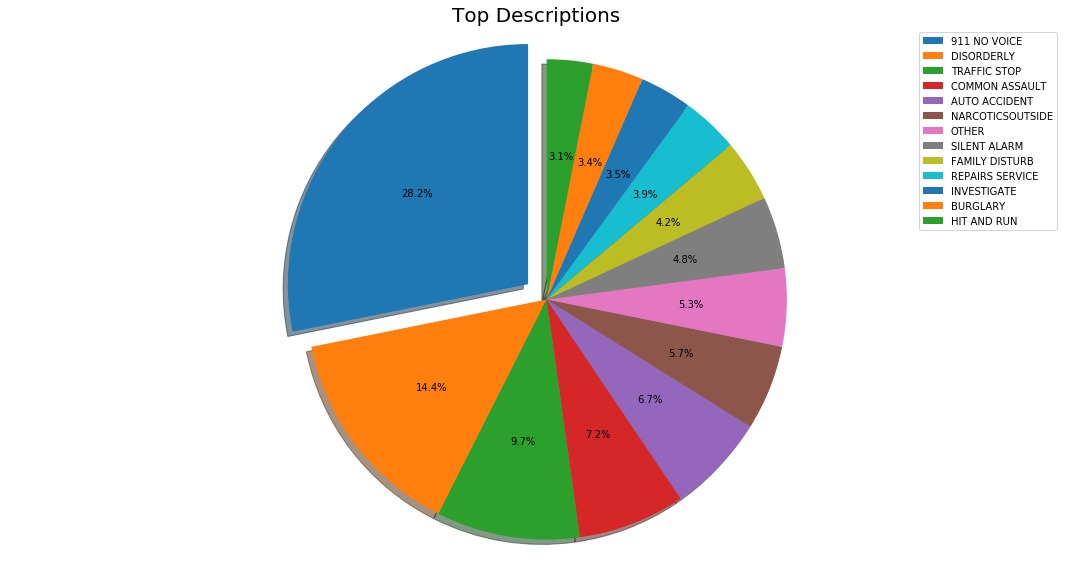

                  priority       Size  Explode
description                                   
911 NO VOICE        489758  28.167198      0.1
DISORDERLY          250189  14.388990      0.0
TRAFFIC STOP        167912   9.657036      0.0
COMMON ASSAULT      125568   7.221727      0.0
AUTO ACCIDENT       116050   6.674323      0.0
NARCOTICSOUTSIDE     99549   5.725310      0.0
OTHER                91515   5.263255      0.0
SILENT ALARM         84249   4.845369      0.0
FAMILY DISTURB       72676   4.179777      0.0
REPAIRS SERVICE      67050   3.856212      0.0
INVESTIGATE          60813   3.497507      0.0
BURGLARY             59620   3.428894      0.0
HIT AND RUN          53804   3.094402      0.0


In [15]:
# get group by description for all calls, and get top records only
grouped = calls.groupby('description').count()
grouped.sort_values('priority', ascending=False, inplace=True)
DrawPieChart(grouped[grouped.priority>50000][['priority']].reset_index().set_index('description')['priority'], \
             'Top Descriptions', 'alldescription.png')

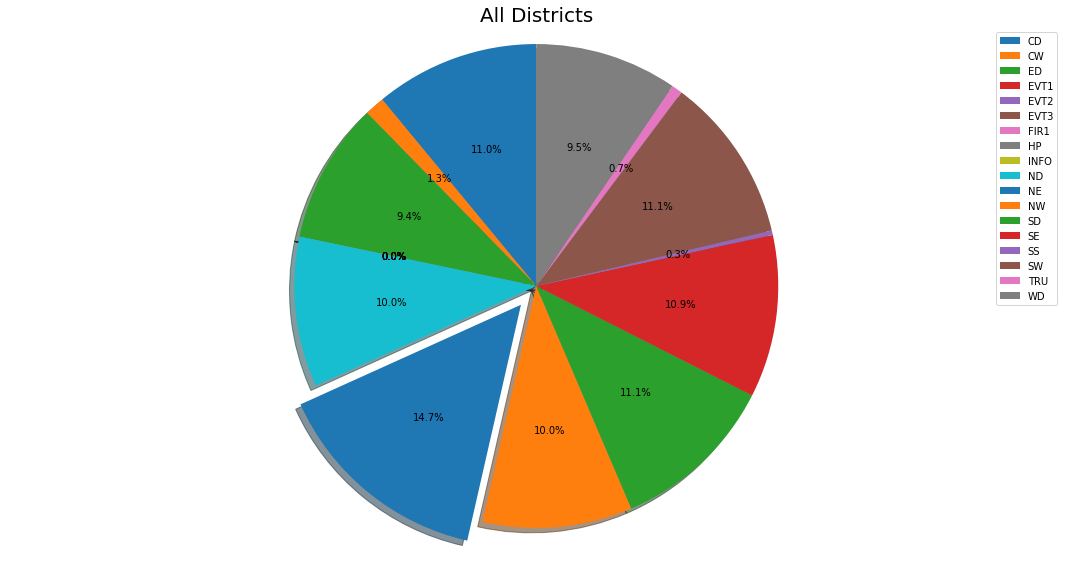

          callNumber       Size  Explode
district                                
CD            307663  10.988514      0.0
CW             37240   1.330067      0.0
ED            263214   9.400970      0.0
EVT1              45   0.001607      0.0
EVT2              43   0.001536      0.0
EVT3              10   0.000357      0.0
FIR1               2   0.000071      0.0
HP                 2   0.000071      0.0
INFO              11   0.000393      0.0
ND            280882  10.032002      0.0
NE            410961  14.677912      0.1
NW            279699   9.989749      0.0
SD            311055  11.109663      0.0
SE            303942  10.855614      0.0
SS              8314   0.296943      0.0
SW            310137  11.076875      0.0
TRU            20059   0.716429      0.0
WD            266581   9.521226      0.0


In [16]:
# Draw chart for all districts
DrawPieChart(calls.groupby('district').callNumber.count(), 'All Districts', 'alldistrict.png')

In [17]:
#let's create daily data
daily_data = calls.resample('D').callNumber.count()
#convert to dataframe
daily_data = pd.DataFrame(daily_data)
# add weekdays column
daily_data['Weekdays'] = daily_data.index.weekday_name

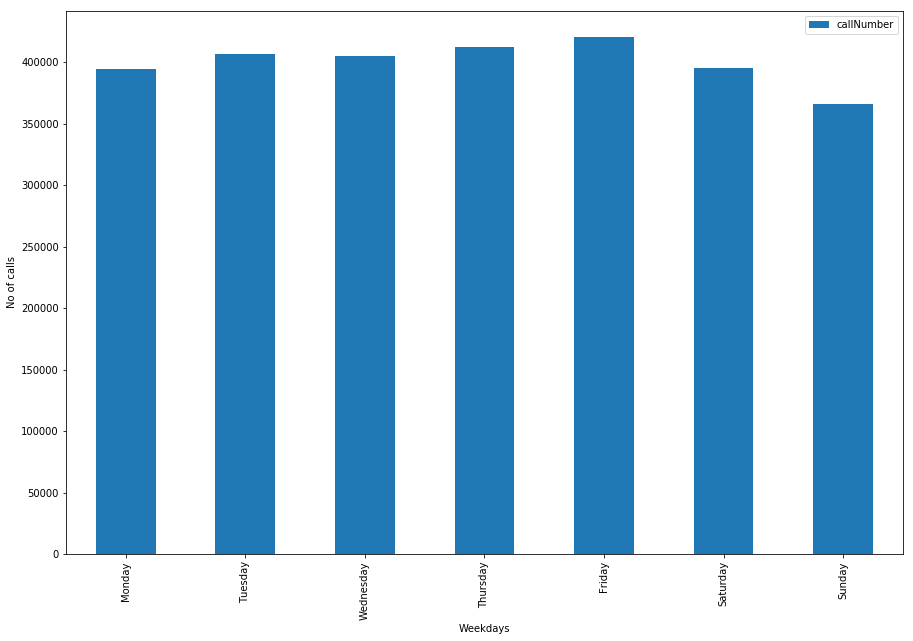

In [25]:
# group by weekdays and check how many calls each day
ax =daily_data.groupby('Weekdays').sum()\
.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])\
    .plot(kind='bar', figsize=(15,10))
SetChartProperties(ax, 'Weekdays', 'No of calls', '')
plt.savefig('callsbyweekdays.png', bbox_inches='tight')

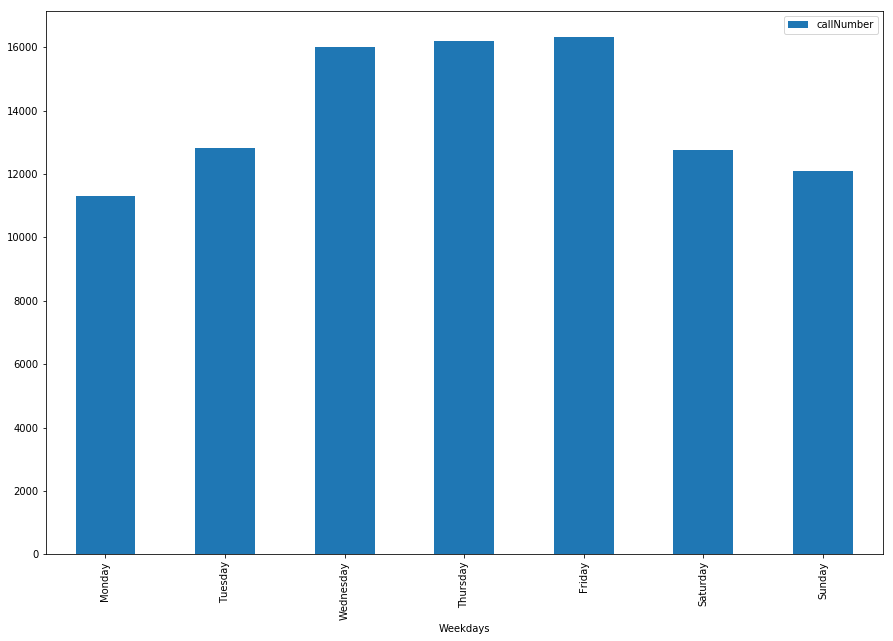

In [26]:
# let's check which day was highest calls on July 2015, seems like Wed, Thru, and Friday are highest
daily_data['2015-07'].groupby('Weekdays')\
.sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])\
    .plot(kind='bar', figsize=(15,10))

In [61]:
calls.resample('D').callNumber.count().sort_values(ascending=False).head()

callDateTime
2015-04-28    4441
2015-07-02    3514
2016-04-25    3500
2015-04-18    3498
2016-03-24    3496
Name: callNumber, dtype: int64

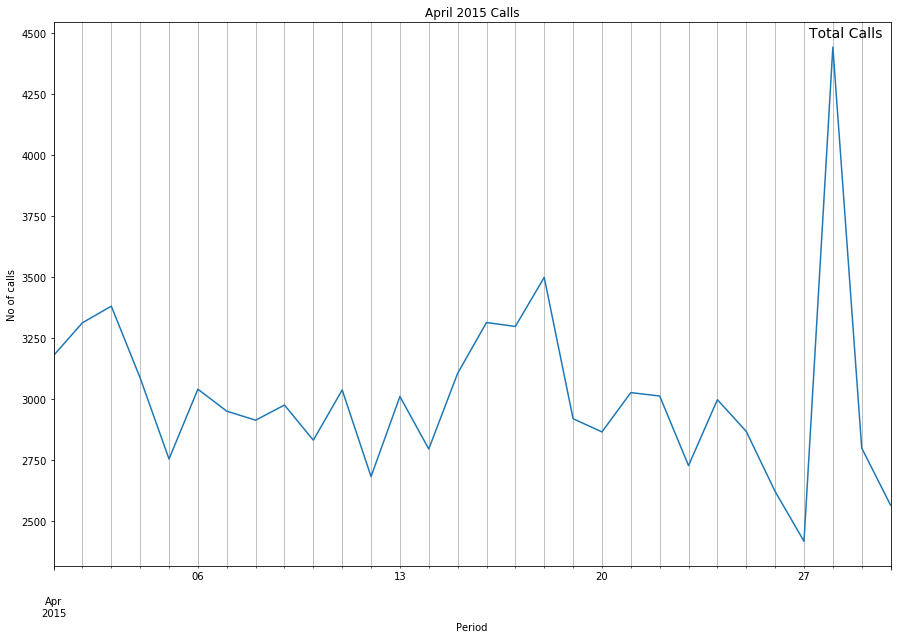

In [62]:
# April 2015 seems like a larger data, let's create a chart on this month.
ax =calls['2015-04'].resample('D').callNumber.count().plot(figsize=(15,10), title="April 2015 Calls")
SetChartProperties(ax, 'Period', 'No of calls', 'Total Calls')

<b>Facts for April 2015</b>

http://www.cnn.com/2015/04/27/us/baltimore-riots-timeline/index.html

https://en.wikipedia.org/wiki/Death_of_Freddie_Gray

http://www.cnn.com/2015/04/27/us/baltimore-unrest/index.html

https://www.nytimes.com/2015/04/26/us/baltimore-crowd-swells-in-protest-of-freddie-grays-death.html

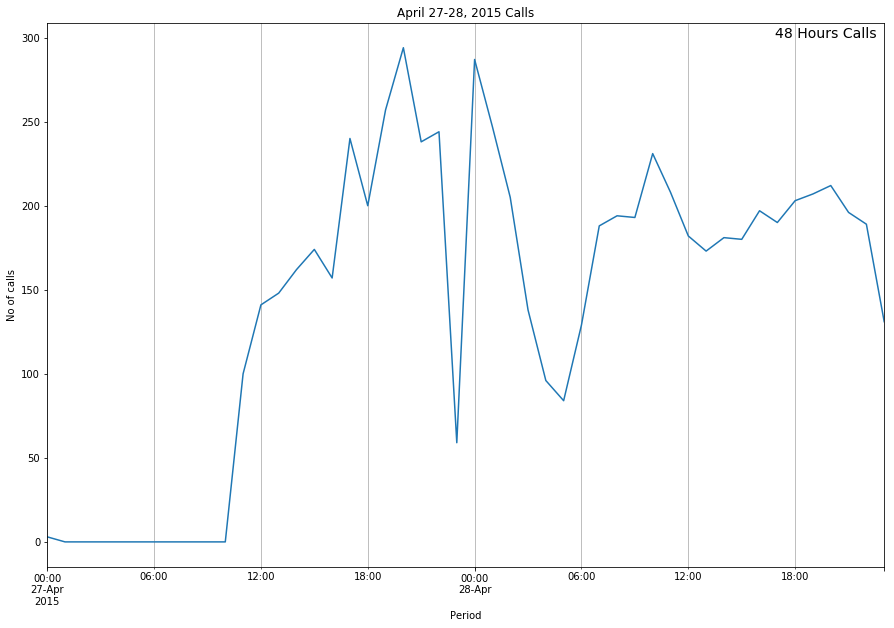

In [29]:
# April 27-28 calls
ax =calls['2015-04-27': '2015-04-28'].resample('H').callNumber.count().plot(figsize=(15,10), \
                                                    title="April 27-28, 2015 Calls")
SetChartProperties(ax, 'Period', 'No of calls', '48 Hours Calls')
plt.savefig('april2728.png', bbox_inches='tight')

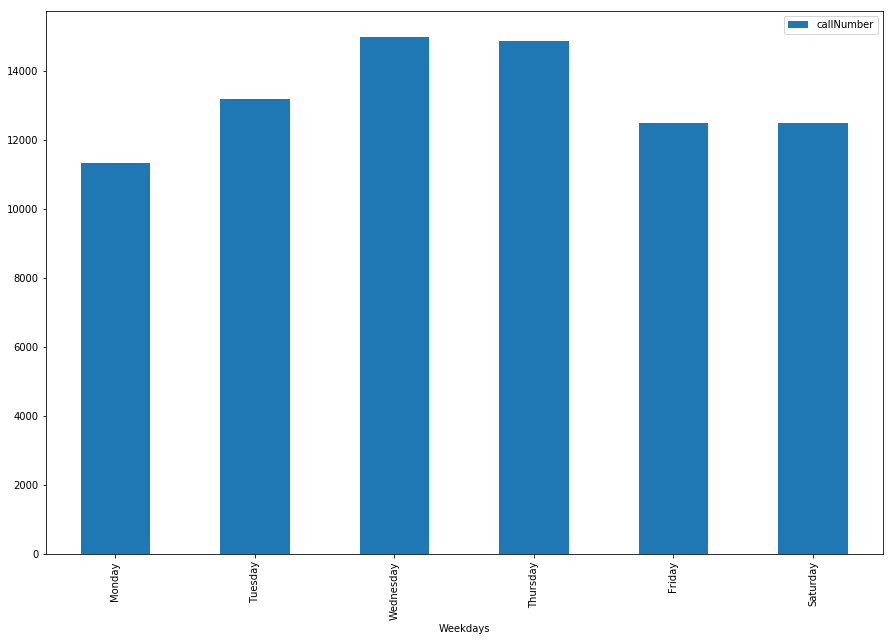

In [65]:
# April 2015 day of weeks chart
daily_data['2015-04'].groupby('Weekdays').sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])\
    .plot(kind='bar', figsize=(15,10))